In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numba import njit

In [2]:
def aos_1d(vec,lamb,n_iteration,step=.25,h_grid=1):
    l_vec=len(vec)
    eye_vec=np.eye(l_vec)
    state=vec.copy()
#     grad_1d=central_gradient_1d(state,h_grid)
    
    for _ in range(n_iteration):
        grad_1d=central_gradient_1d(state,h_grid)
#         grad_1d=np.diff(np.pad(state,1))[:-1]
        g_current_iter=diffusivity(0.5*grad_1d**2,lamb)
        a=build_matrix_a(g_current_iter)
        q=eye_vec+step*a
        state=state@q  
    return state


In [3]:
def diffusivity(mat,lamb):
    ret_val=1-np.exp(-3.315/(mat/lamb)**4)
    ret_val[mat<=0]=1
    return ret_val

def k2(mat,sigma):
    return np.exp(-(np.abs(mat)/sigma)**2)

In [4]:
@njit
def build_matrix_a(vec,h_grid=1):
    length=len(vec)
    ret_val=np.zeros((length,length))
    for i in range(length):
        for j in range( length):
            if i==j:
                    ret_val[i,j]=-(2*vec[i*(i>=0)]+vec[i-1]+vec[(i+1)*(i+1<=length)+(i+1>length)*length])/2/h_grid**2   
            elif abs(i-j)==1:
                ret_val[i,j]=(vec[i]+vec[j])/2/h_grid**2
                
    return ret_val
                

In [5]:
# @njit
def central_gradient_1d(vec,h_grid=1):
    padded_vec=np.pad(vec,1)
    ret_val=padded_vec
    for i in range(1,len(padded_vec)-1):
        ret_val[i]=(ret_val[i+1]-ret_val[i-1])/(2*h_grid)
    
    return ret_val[1:-1]
        
    

In [6]:
def ar1_source(size=100,rho=.8):
    ret_val=np.zeros(size)
    for i in range(1,size):
        ret_val[i]=ret_val[i-1]*rho+np.random.randn()
        
    return ret_val

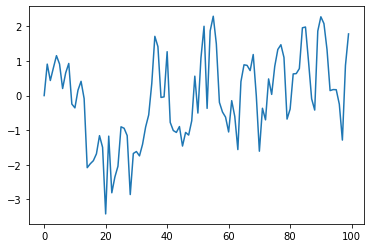

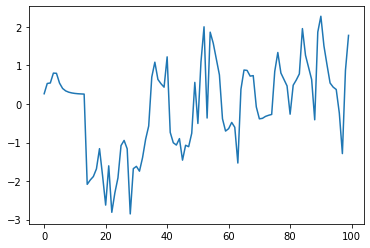

In [12]:
a=ar1_source()
plt.plot(a)
aa=aos_1d(a,.001,1550,step=.45)
plt.figure()
plt.plot(aa)

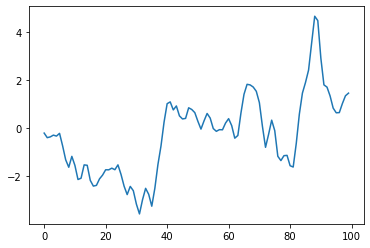

In [58]:
aa=aos_1d(a,900,1,.3)
plt.plot(aa)

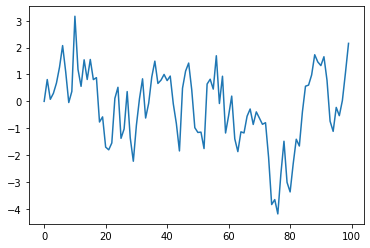

In [222]:
bb=ar1_source()
plt.plot(bb)

In [223]:
a=np.linspace(0,100,100)

<ipython-input-214-27472777e593>:2: RuntimeWarning: divide by zero encountered in true_divide
  ret_val=1-np.exp(-3.315/(mat/lamb)**4)


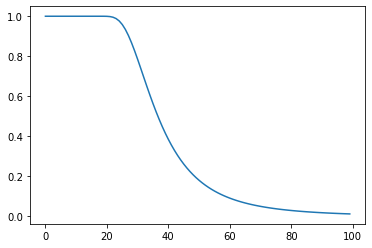

In [224]:
b=diffusivity(a,25)
plt.plot(b)

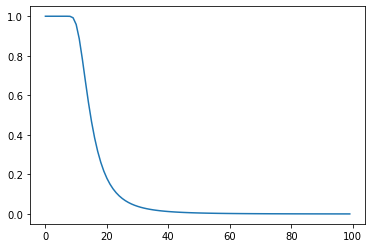